![Social Media Use Analysis Image1](./assets/socmed_analysis_img1.jpg)

# Investigating User Segmentation and Emotional Influence in Social Media with K-means Clustering

This project delves into the application of **K-means clustering** in exploring user segmentation and the influence of emotions on social media behavior. By examining user activity patterns and dominant emotional expression, the project aims to uncover the various hidden patterns of user demographics and the formation of online communities.

In [1]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

df = pd.read_csv('./data/soc_med_use_analysis.csv')
df

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,27,Female,Snapchat,120,4,40,18,22,Neutral
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,27,Male,Telegram,105,3,48,20,28,Anxiety
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...
1097,33,Non-binary,Twitter,85,4,35,18,18,Boredom
1098,22,Female,Facebook,70,1,14,6,10,Neutral
1099,35,Male,Whatsapp,110,3,50,25,25,Happiness
1100,28,Non-binary,Telegram,60,2,18,8,18,Anger


_______________________________________________________________________________________________________________________________

# Modeling the Problem to be Solved
The project can be modeled as an unsupervised learning problem where the goal is to **uncover hidden structures** within the given social media dataset. Specifically, K-means clustering, an algorithm that partitions data points into distinct groups based on similarities, will be employed to segment users. The features used for clustering will represent social media activity patterns such as post frequency, engagement metrics, content types, and dominant emotions. By analyzing these features, we aim to capture the essence of user behavior on social media and group individuals with similar characteristics into distinct clusters. This approach allows us to investigate how user segmentation based on activity and emotions can provide insights into the dynamics of social media and the formation of online communities.

![Social Media Use Analysis Image2](./assets/socmed_analysis_img2.png)

_______________________________________________________________________________________________________________________________

# Exploratory Data Analysis (EDA)

### Structural Analysis of the Dataset
For the current dataset, it consists of specifically **1102 rows** (datapoints) and **9 columns** (features). The features of this dataset involve both categorical and numerical data in where the categorical feature include gender, platform, and dominant_emotion. In order to incorporate them in the data modeling, these features must be transformed into numerical data through data encoding (will be done at the later parts of this project).

In [2]:
df.shape

(1102, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1102 non-null   int64 
 1   Gender                      1102 non-null   object
 2   Platform                    1102 non-null   object
 3   Daily_Usage_Time (minutes)  1102 non-null   int64 
 4   Posts_Per_Day               1102 non-null   int64 
 5   Likes_Received_Per_Day      1102 non-null   int64 
 6   Comments_Received_Per_Day   1102 non-null   int64 
 7   Messages_Sent_Per_Day       1102 non-null   int64 
 8   Dominant_Emotion            1102 non-null   object
dtypes: int64(6), object(3)
memory usage: 77.6+ KB


### Renaming DataFrame columns
The obtained dataset's column names have inconsistently naming patterns that do not match the current naming standard. Therefore, I renamed these columns following the **"snake case"** standard.

In [4]:
new_col_names = ['age', 'gender', 'platform', 'daily_usage_time', 'posts_per_day',
                'likes_received_per_day', 'comments_received_per_day', 
                'messages_sent_per_day', 'dominant_emotion']

df = df.set_axis(new_col_names, axis=1)

df

,age,gender,platform,daily_usage_time,posts_per_day,likes_received_per_day,comments_received_per_day,messages_sent_per_day,dominant_emotion
0,27,Female,Snapchat,120,4,40,18,22,Neutral
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,27,Male,Telegram,105,3,48,20,28,Anxiety
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...
1097,33,Non-binary,Twitter,85,4,35,18,18,Boredom
1098,22,Female,Facebook,70,1,14,6,10,Neutral
1099,35,Male,Whatsapp,110,3,50,25,25,Happiness
1100,28,Non-binary,Telegram,60,2,18,8,18,Anger


### Checking for Null Values

The given dataset does not have any null values in any of the data points. Therefore, no further data manipulation is needed to be performed.

In [5]:
df.isnull().sum()

age                          0
gender                       0
platform                     0
daily_usage_time             0
posts_per_day                0
likes_received_per_day       0
comments_received_per_day    0
messages_sent_per_day        0
dominant_emotion             0
dtype: int64

### Multivariate Analysis

The graph below shows a **correlational heatmap** that shows the relationship mapping of every numerical variable  in the dataset. In this case, we can notice that most of the features show very high correlation with each other except for the 'age' feature. Specifically, the **'age'** feature exhibits **no correlation** with any of the other numerical features in the dataset. This is important to note as it indicates its importance to the cluster profiling in the later stages of this project.

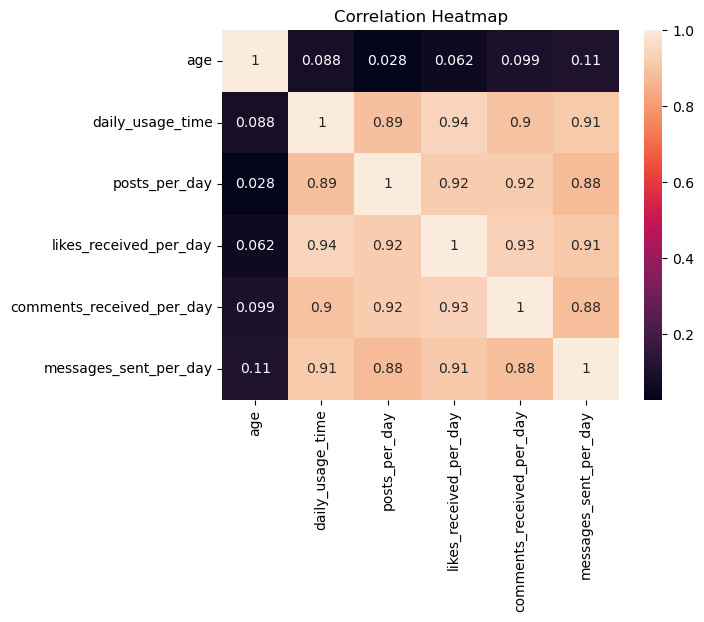

In [6]:
correlation_matrix = df.corr()

# Creating a correlation heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

_______________________________________________________________________________________________________________________________

# Feature Engineering

### Label Encoding

In [7]:
new_df = df.copy(deep=True)

In [8]:
gender = df['gender']
platform = df['platform']
dominant_emotion = df['dominant_emotion']

gender_encoder = LabelEncoder()
platform_encoder = LabelEncoder()
dominant_emotion_encoder = LabelEncoder()

new_df['gender'] = gender_encoder.fit_transform(gender)
new_df['platform'] = platform_encoder.fit_transform(platform)
new_df['dominant_emotion'] = gender_encoder.fit_transform(dominant_emotion)

new_df

,age,gender,platform,daily_usage_time,posts_per_day,likes_received_per_day,comments_received_per_day,messages_sent_per_day,dominant_emotion
0,27,0,3,120,4,40,18,22,4
1,21,2,3,60,1,18,7,12,4
2,28,2,3,115,3,38,18,27,1
3,27,1,4,105,3,48,20,28,1
4,21,2,0,55,3,17,7,12,4
...,...,...,...,...,...,...,...,...,...
1097,33,2,5,85,4,35,18,18,2
1098,22,0,0,70,1,14,6,10,4
1099,35,1,6,110,3,50,25,25,3
1100,28,2,4,60,2,18,8,18,0


### Feature Scaling

It is also important to scale the datapoint values of each feature in this case because of their varying value ranges. This allows us to obtain better results for the clustering model.

In [9]:
X = new_df

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

_______________________________________________________________________________________________________________________________

<br><br><center><font size = 6.5><b>K-Means Clustering</b></font></center>

### Utilizing the Elbow Method

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


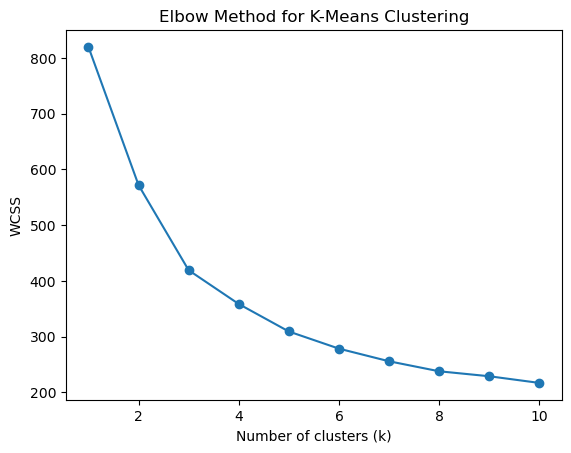

In [10]:
#Within-Cluster Sum of Square
wcss = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1,11), wcss, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

By analyzing the WCSS values above using the Elbow Method, it is observable that the WCSS's rate of decrease slows down on k=3. Therefore, **k=3** might be a reasonable choice for the number of clusters, although other factors like interpretability of the clusters can be considered provided that the elbow is not very 'sharp'.

HOWEVER, this K-Means model chooses to use **k=5** for the number of clusters. Why?

**Reasoning**: After experimenting with multiple cluster sizes (k=3 and k=4), I find that the it **doesn't capture specific patterns** for the intended purpose of the project. To further discuss, the key comparison feature of this dataset is the 'dominant_emotion' feature. In small cluster sizes of k=3 and k=4, the distinction between each cluster in terms of dominant emotion is unclear and non-unique. However, using k=5, I am able to find unique patterns for clear distinctions of each cluster.

Furthermore, in the smaller cluster sizes, I find that there is **greater cluster imbalance** compared to k=5. For instance, the number of datapoint disparity in the smallest and largest cluster datapoint count when k=3 reaches 200. In consideration of this, this made me prefer the usage of k=5 as the number of clusters.

### Building the Model

In [11]:
k_means = KMeans(n_clusters = 5, random_state = 42)
y_means = k_means.fit(X_scaled)
y_means

KMeans(n_clusters=5, random_state=42)

In [12]:
cluster_labels = k_means.labels_
new_df['cluster'] = cluster_labels

print(new_df.groupby('cluster').describe())

           age                                                    gender  \
         count       mean       std   min   25%   50%   75%   max  count   
cluster                                                                    
0        263.0  28.163498  4.198314  21.0  25.0  28.0  32.0  35.0  263.0   
1        280.0  25.796429  3.453426  21.0  23.0  26.0  28.0  34.0  280.0   
2        215.0  27.530233  3.391546  22.0  24.0  27.0  30.0  35.0  215.0   
3        169.0  26.402367  3.162879  21.0  24.0  27.0  29.0  31.0  169.0   
4        175.0  30.205714  3.596450  22.0  28.0  31.0  34.0  35.0  175.0   

                   ... messages_sent_per_day       dominant_emotion            \
             mean  ...                   75%   max            count      mean   
cluster            ...                                                          
0        0.403042  ...                  38.0  50.0            263.0  2.866920   
1        2.000000  ...                  20.0  27.0            280.0

_______________________________________________________________________________________________________________________________

<br><br><center><font size = 6.5><b>Model Evaluation</b></font></center>

As a consequence of the unsupervised clustering, we lack a tagged feature to rate or assess our model. In order to determine the nature of the patterns inside the clusters, it is necessary to examine the patterns within the clusters that have developed.

We will use exploratory data analysis to examine the data based on the obtained clusters and make the necessary inferences in order to reach a valid conclusion (cluster profiling) for this project.

### General Cluster Distribution

Based on the chosen cluster size of k=5, it seems that the clusters are **fairly distributed**.

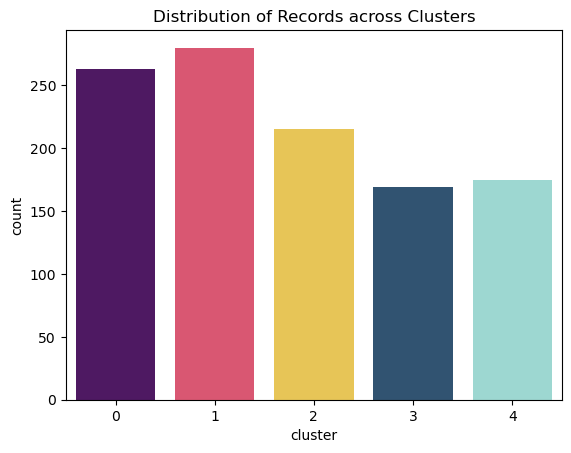

In [13]:
pal = ["#540d6e","#ee4266", "#ffd23f","#26547c", "#93e1d8", "#b8b8ff"]
pl = sns.countplot(x=new_df['cluster'], palette= pal)
pl.set_title("Distribution of Records across Clusters")
plt.show()

In [14]:
new_df.loc[new_df['cluster'] == 0].count()

age                          263
gender                       263
platform                     263
daily_usage_time             263
posts_per_day                263
likes_received_per_day       263
comments_received_per_day    263
messages_sent_per_day        263
dominant_emotion             263
cluster                      263
dtype: int64

In [15]:
new_df.loc[new_df['cluster'] == 1].count()

age                          280
gender                       280
platform                     280
daily_usage_time             280
posts_per_day                280
likes_received_per_day       280
comments_received_per_day    280
messages_sent_per_day        280
dominant_emotion             280
cluster                      280
dtype: int64

In [16]:
new_df.loc[new_df['cluster'] == 2].count()

age                          215
gender                       215
platform                     215
daily_usage_time             215
posts_per_day                215
likes_received_per_day       215
comments_received_per_day    215
messages_sent_per_day        215
dominant_emotion             215
cluster                      215
dtype: int64

In [17]:
new_df.loc[new_df['cluster'] == 3].count()

age                          169
gender                       169
platform                     169
daily_usage_time             169
posts_per_day                169
likes_received_per_day       169
comments_received_per_day    169
messages_sent_per_day        169
dominant_emotion             169
cluster                      169
dtype: int64

In [18]:
new_df.loc[new_df['cluster'] == 4].count()

age                          175
gender                       175
platform                     175
daily_usage_time             175
posts_per_day                175
likes_received_per_day       175
comments_received_per_day    175
messages_sent_per_day        175
dominant_emotion             175
cluster                      175
dtype: int64

_______________________________________________________________________________________________________________________________

<br><br><center><font size = 6.5><b>Cluster Profiling</b></font></center>

By assessing the different patterns captured in each cluster, we can formulate **unique identities** for each of them using comprehensive exploratory data analysis.

## General Age Distribution

The obtained clusters seem to fairly capture all age groups in a similar fashion except for cluster 4. Given the data of this boxenplot and the previous correlation heatmap (showed that age offers no correlation with other features), **'age' is mostly not a unique identifying feature for any of the clusters.** 

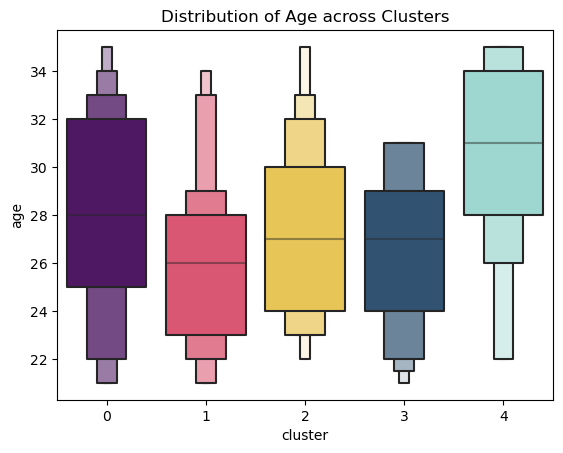

In [19]:
plt.figure()
sns.boxenplot(x=new_df['cluster'], y=new_df['age'], palette=pal)
plt.title('Distribution of Age across Clusters')
plt.show()


## Gender Distribution

The graph below can be interpreted as:
* **Cluster 0**: Majorly composed of females while males constitute half of the female population. The number of non-binaries in this cluster is negligible.
* **Cluster 1**: Composed entirely of non-binary individuals.
* **Cluster 2**: Mostly composed of females and males of similar count. The number of non-binaries in this cluster is negligible.
* **Cluster 3**: Mostly composed of females and males of similar count. The number of non-binaries in this cluster is negligible.
* **Cluster 4**: Mostly composed of females and males while males constitute half of the female population. The number of non-binaries in this cluster is negligible.

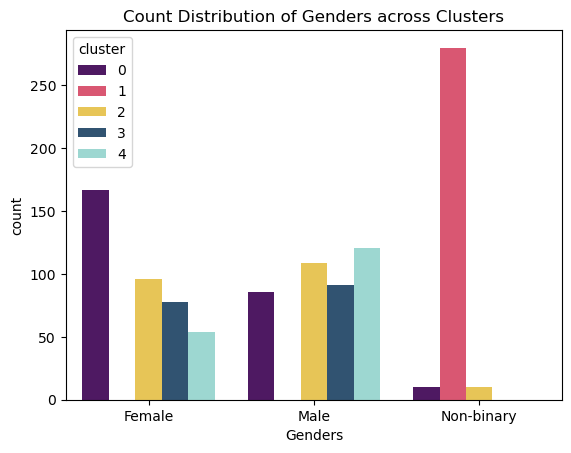

In [20]:
gender_categories = ['Female', 'Male', 'Non-binary']

sns.countplot(x=new_df['gender'], hue=new_df['cluster'], palette=pal)
plt.title('Count Distribution of Genders across Clusters')
plt.xlabel('Genders')
plt.xticks(range(len(gender_categories)), gender_categories)
plt.show()

## Preferred Platform Distribution
The graph below can be interpreted as:
* **Cluster 0**: Composed entirely of Instagram users.
* **Cluster 1**: Majorly composed of Facebook users. It also constitutes a decent number of Snapchat users and LinkedIn users while the other remaining platforms are negligible.
* **Cluster 2**: Majorly composed of Twitter users and Whatsapp users in where the number of Twitter users are double the number of Whatsapp users. Meanwhile, there are small minorities of Snapchat and Telegram users that are quite negligible in number.
* **Cluster 3**: Majorly composed of Twitter and Telegram users.
* **Cluster 4**: Majorly composed of LinkedIn and Facebook users, but significantly lower than the Facebook users belonging to Cluster 1.

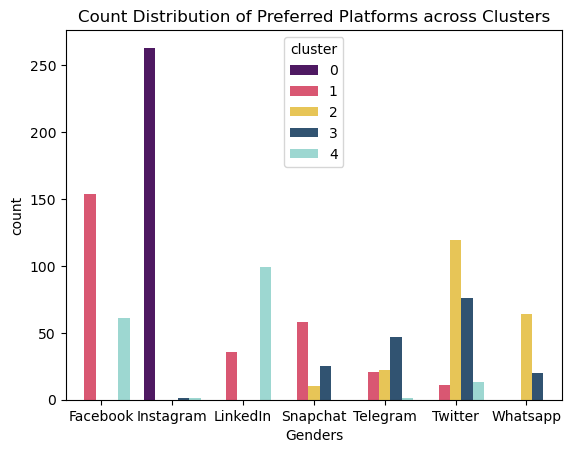

In [21]:
plat_categories = ['Facebook', 'Instagram', 'LinkedIn', 'Snapchat', 'Telegram', 'Twitter', 'Whatsapp']

sns.countplot(x=new_df['platform'], hue=new_df['cluster'], palette=pal)
plt.title('Count Distribution of Preferred Platforms across Clusters')
plt.xlabel('Genders')
plt.xticks(range(len(plat_categories)), plat_categories)
plt.show()

## Dominant Emotion Distribution
The graph below can be interpreted as:
* **Cluster 0**: Composed entirely of happy individuals.
* **Cluster 1**: Majorly composed of emotionally neutral, sad, and anxious individuals.
* **Cluster 2**: Majorly composed of angry and anxious individuals.
* **Cluster 3**: Mainly composed of sad and emotionally neutral individuals.
* **Cluster 4**: Mostly composed of bored individuals.

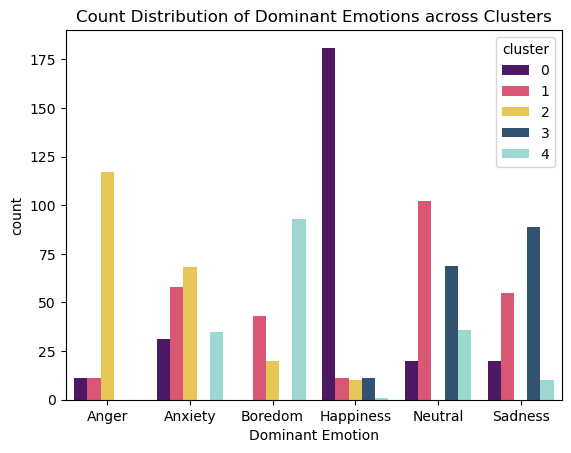

In [22]:
emotion_categories = ['Anger', 'Anxiety', 'Boredom', 'Happiness', 'Neutral', 'Sadness']

sns.countplot(x=new_df['dominant_emotion'], hue=new_df['cluster'], palette=pal)
plt.title('Count Distribution of Dominant Emotions across Clusters')
plt.xlabel('Dominant Emotion')
plt.xticks(range(len(emotion_categories)), emotion_categories)
plt.show()

## Correlation of Daily Social Media Usage Time and the Dominant Emotion Experienced by Clusters

The graph below can be interpreted as:
* **Cluster 0**: Mostly constituting happy individuals, individuals in this cluster have high daily social media usage time in the ranges of 120 minutes to 190 minutes. Furthermore, it is important to note that the boxenplot's densest area lies in the 150-170 minutes range which represents most individuals in this cluster.
* **Cluster 1**: Composed of neutral, anxious, and sad individuals, individuals in this cluster have moderate levels of daily social media usage time in the ranges of 60 to 100 minutes.
* **Cluster 2**: Composed of angry and anxious individuals, individuals in this cluster have moderate levels of daily social media usage time in the ranges of 70 to 120 minutes.
* **Cluster 3**: Comprised of neutral and sad individuals, individuals in this cluster have moderate levels of daily social media usage time in the average ranges of 80 to 100 minutes.
* **Cluster 4**: Mostly constituting bored individuals, it is observable that they have low levels of daily social media usage time in the ranges of 40 to 70 minutes. Furthermore, the average daily usage time in this case is 60 minutes per day.

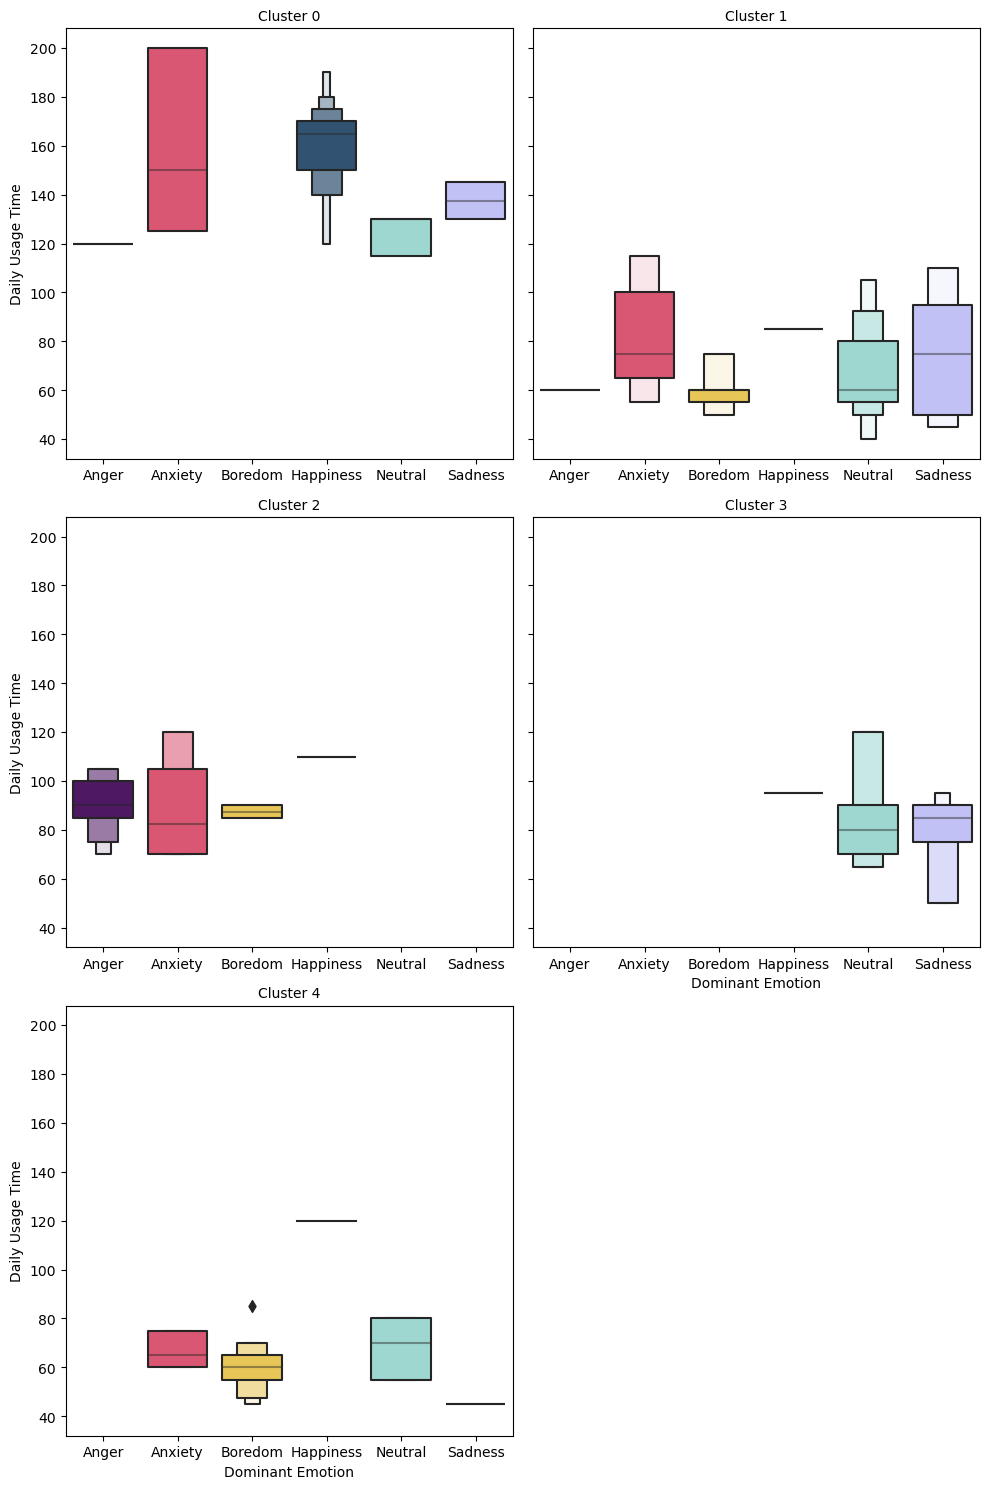

In [23]:
g = sns.FacetGrid(new_df, col='cluster', hue='dominant_emotion', sharex=False, col_wrap=2, height=5, despine=False)
g.map(sns.boxenplot, 'dominant_emotion', 'daily_usage_time', palette=pal, order=[0, 1, 2, 3, 4, 5])
g.set_axis_labels(x_var='Dominant Emotion', y_var='Daily Usage Time')
g.set_xticklabels(labels=emotion_categories)
g.set_titles(col_template='Cluster {col_name}')
plt.show()

## Correlation of Posts Per Day and the Dominant Emotion Experienced by Clusters

The graph below can be interpreted as:
* **Cluster 0**: Mostly constituting happy individuals, individuals in this cluster have a high number of posts per day of around 5-8 posts per day.
* **Cluster 1**: Emotionally neutral and anxious individuals in this cluster exhibit low number of posts per day with around 1-3 posts per day. On the other hand, sad individuals in this cluster can have around 1-6 posts per day with an average of 2-3 posts.
* **Cluster 2**: Composed of angry and anxious individuals, individuals in this cluster have a low to moderate number of posts per day of around 2-4 posts. 
* **Cluster 3**: Comprised of neutral and sad individuals, individuals in this cluster have a low to moderate number of posts per day of around 2-4 posts. 
* **Cluster 4**: Mostly constituting bored individuals, individuals in this cluster generally have low number of posts of around 1-2 posts per day.

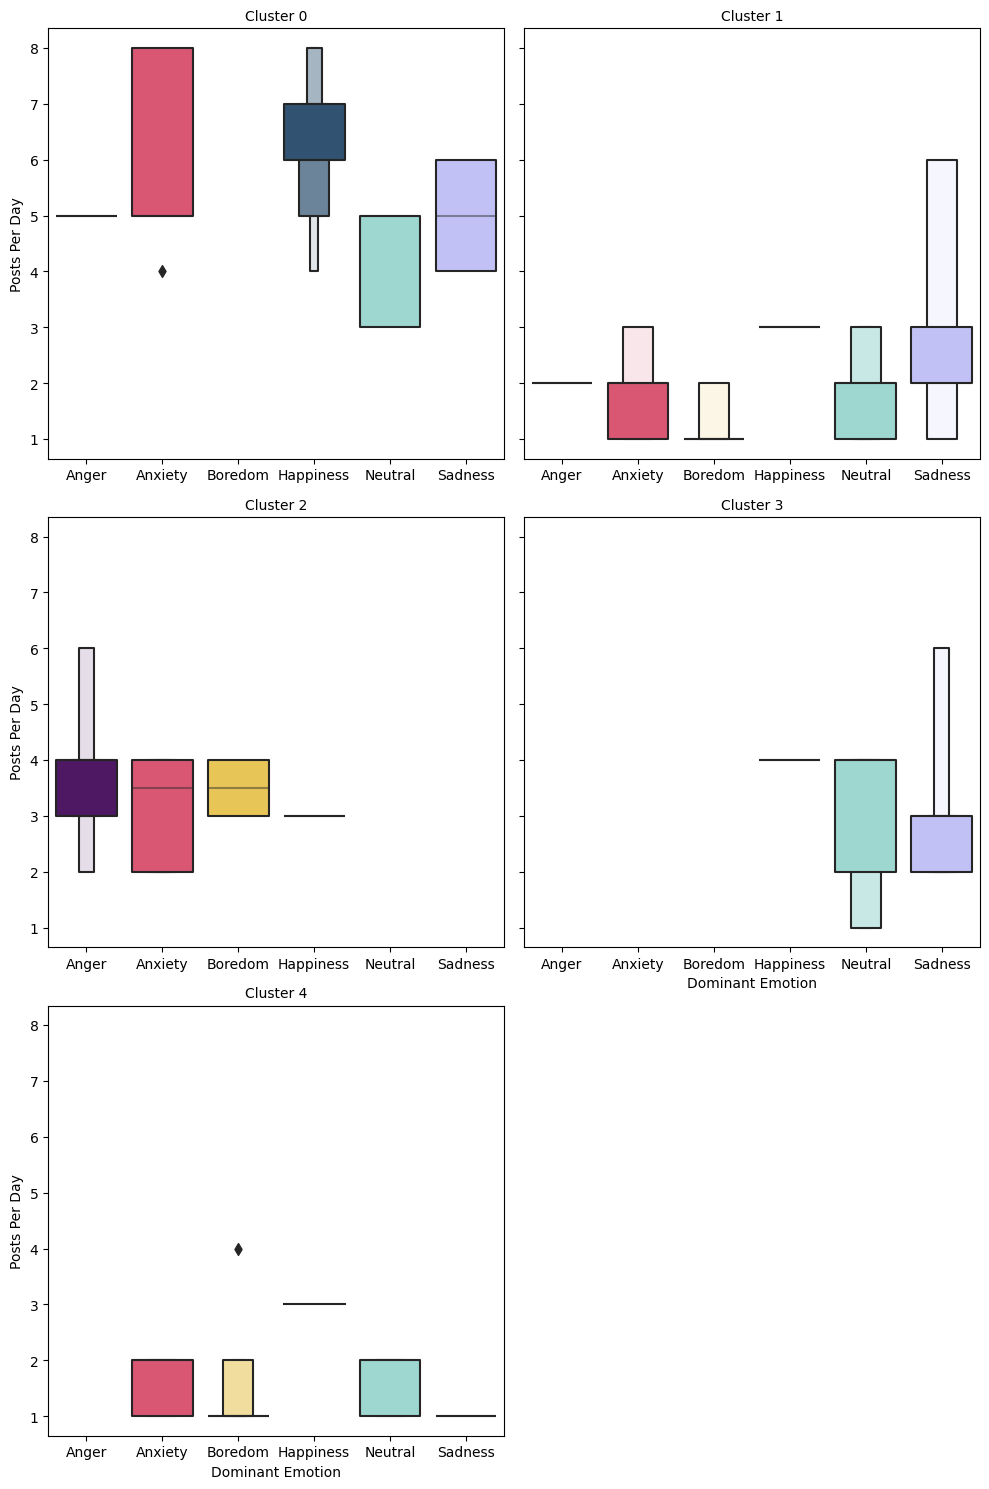

In [24]:
g = sns.FacetGrid(new_df, col='cluster', hue='dominant_emotion', sharex=False, col_wrap=2, height=5, despine=False)
g.map(sns.boxenplot, 'dominant_emotion', 'posts_per_day', palette=pal, order=[0, 1, 2, 3, 4, 5])
g.set_axis_labels(x_var='Dominant Emotion', y_var='Posts Per Day')
g.set_xticklabels(labels=emotion_categories)
g.set_titles(col_template='Cluster {col_name}')
plt.show()

## Correlation of Likes Received Per Day and the Dominant Emotion Experienced by Clusters

The graph below can be interpreted as:
* **Cluster 0**: Mostly constituting happy individuals, individuals in this cluster receive high number of likes per day ranging from 60 to 100 likes.
* **Cluster 1**: Composed of neutral, anxious, and sad individuals, in average, individuals in this cluster receive low to moderate number of likes per day ranging from 10 to 40 likes.
* **Cluster 2**: Composed of angry and anxious individuals, in average, individuals in this cluster receive moderate number of likes per day ranging from 30 to 55 likes. 
* **Cluster 3**: Comprised of neutral and sad individuals, individuals in this cluster receive moderate number of likes per day ranging from 20 to 45 likes.
* **Cluster 4**: Mostly constituting bored individuals, individuals in this cluster receive low number of likes per day ranging from 15 to 20 likes.

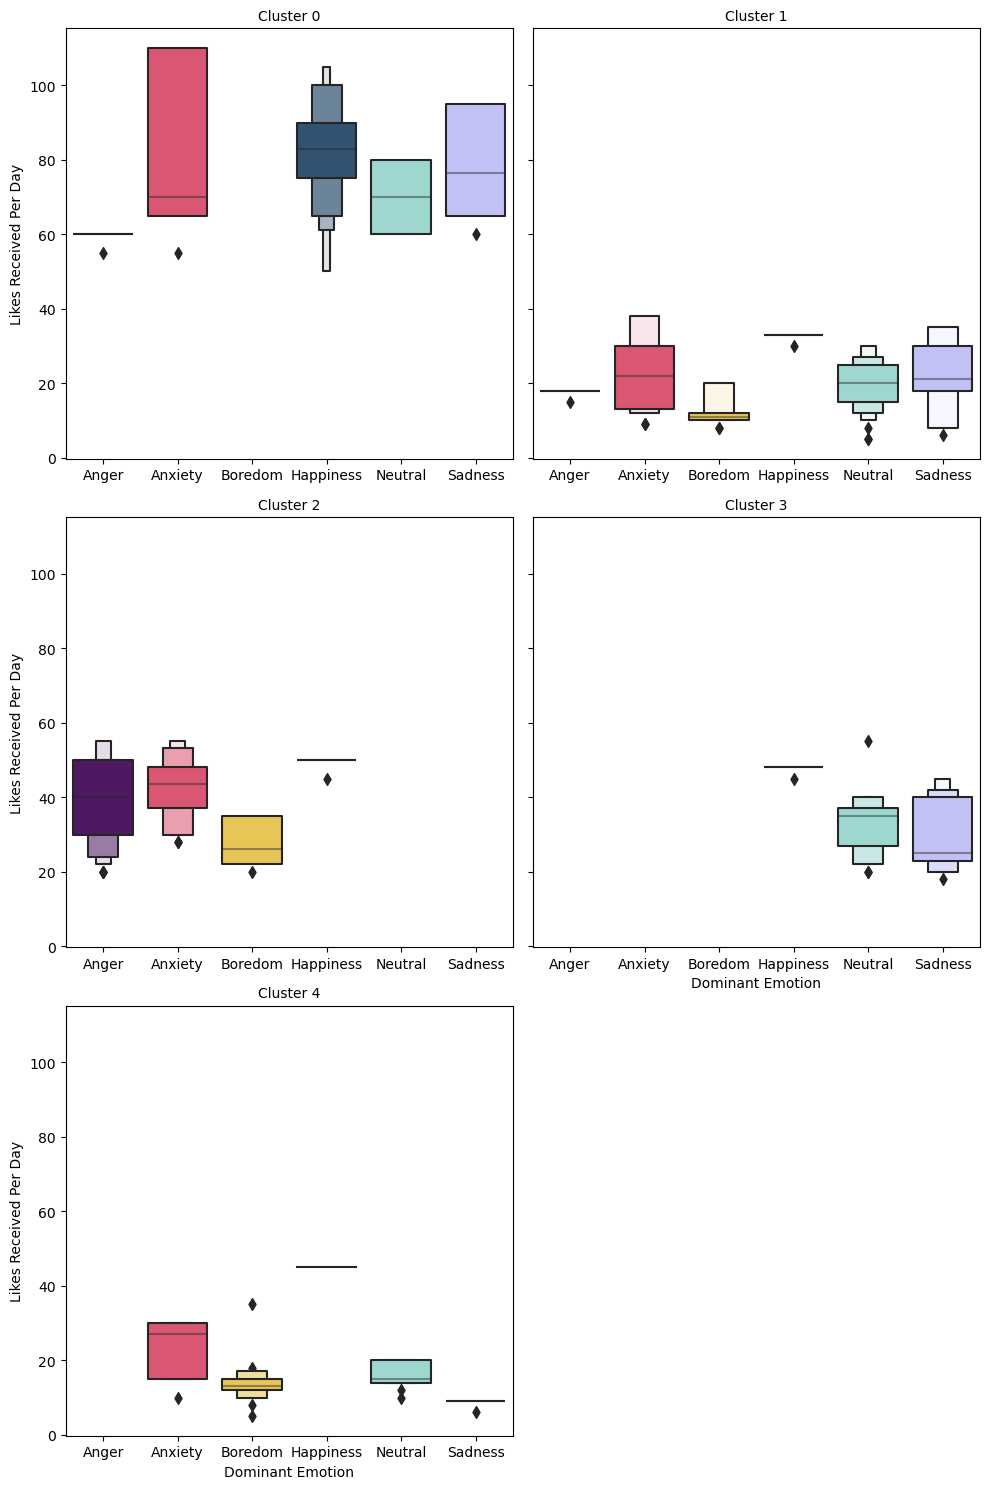

In [25]:
g = sns.FacetGrid(new_df, col='cluster', hue='dominant_emotion', sharex=False, col_wrap=2, height=5, despine=False)
g.map(sns.boxenplot, 'dominant_emotion', 'likes_received_per_day', palette=pal, order=[0, 1, 2, 3, 4, 5])
g.set_axis_labels(x_var='Dominant Emotion', y_var='Likes Received Per Day')
g.set_xticklabels(labels=emotion_categories)
g.set_titles(col_template='Cluster {col_name}')
plt.show()

## Correlation of Comments Received Per Day and the Dominant Emotion Experienced by Clusters

The graph below can be interpreted as:
* **Cluster 0**: Mostly constituting happy individuals, individuals in this cluster receive high number of comments per day ranging from 20 to 37 comments.
* **Cluster 1**: Composed of neutral, anxious, and sad individuals, in average, individuals in this cluster receive low to moderate number of comments per day ranging from 5 to 15 comments.
* **Cluster 2**: Composed of angry and anxious individuals, in average, individuals in this cluster receive moderate to high number of comments per day ranging from 10 to 20 comments in where in a decent number of datapoints, angry individuals have experienced up to 30 comments per day. 
* **Cluster 3**: Comprised of neutral and sad individuals, individuals in this cluster receive moderate number of comments per day ranging from 10 to 20 comments.
* **Cluster 4**: Mostly constituting bored individuals, individuals in this cluster receive low number of comments per day ranging from 5 to 8 comments.

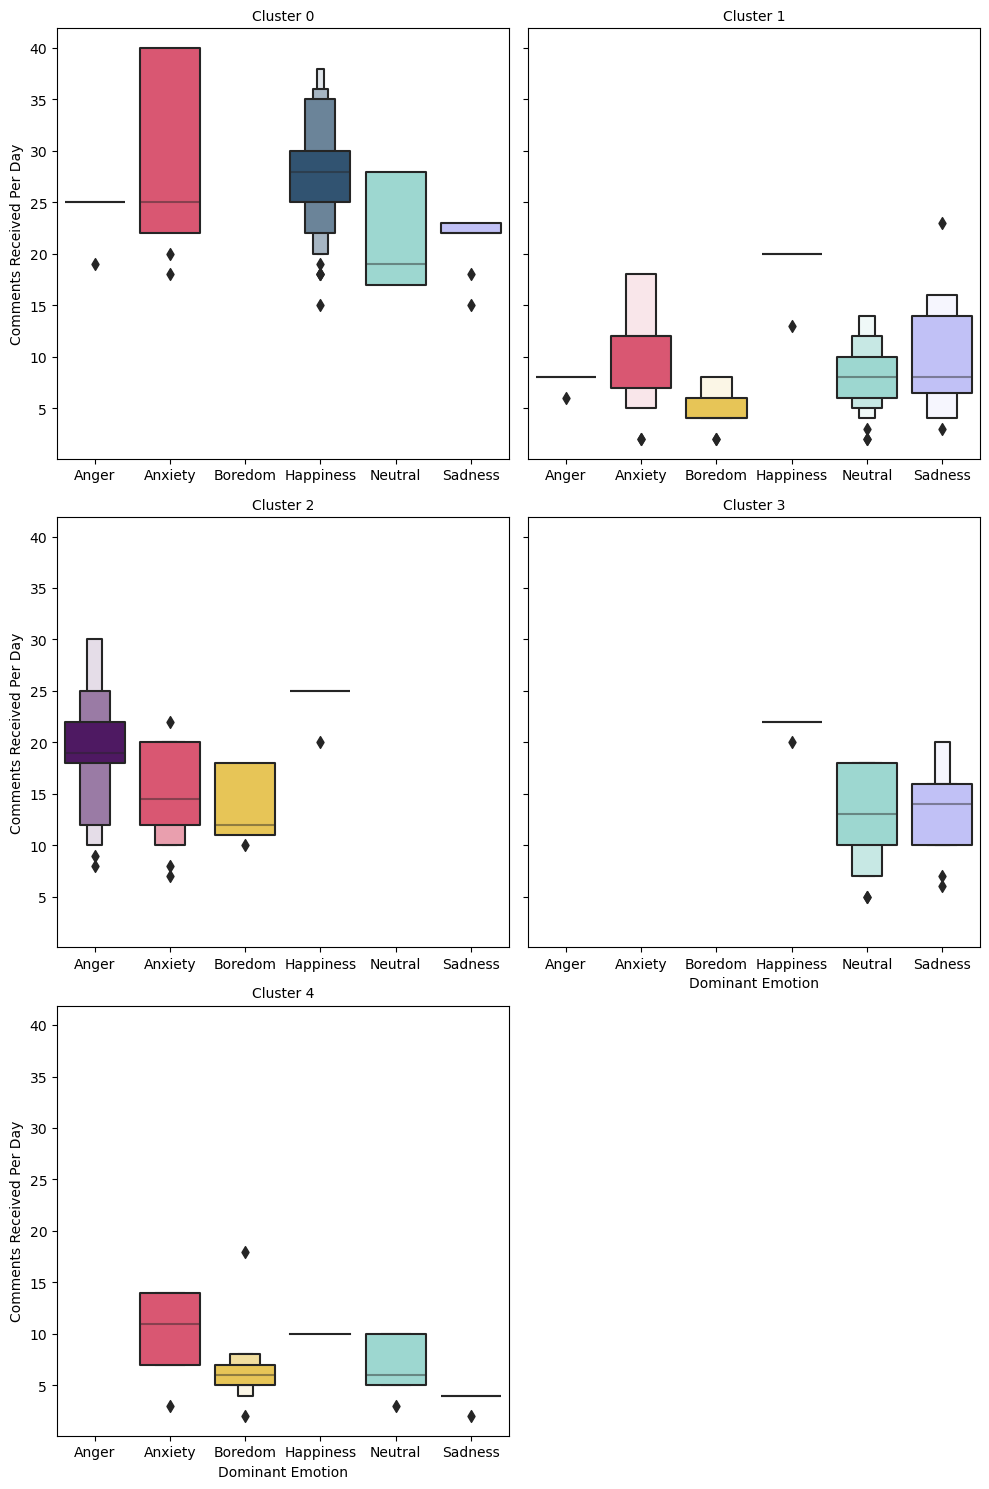

In [26]:
g = sns.FacetGrid(new_df, col='cluster', hue='dominant_emotion', sharex=False, col_wrap=2, height=5, despine=False)
g.map(sns.boxenplot, 'dominant_emotion', 'comments_received_per_day', palette=pal, order=[0, 1, 2, 3, 4, 5])
g.set_axis_labels(x_var='Dominant Emotion', y_var='Comments Received Per Day')
g.set_xticklabels(labels=emotion_categories)
g.set_titles(col_template='Cluster {col_name}')
plt.show()

_______________________________________________________________________________________________________________________________

<br><br><center><font size = 6.5><b>Conclusion</b></font></center>

After performing Exploratory Data Analysis on the various relationships of the different features in the dataset, we were able to indentify the **unique identity** of each cluster. Below are the overall findings of the project:

![Cluster Profiling Image 1](./assets/cluster_profiling1.png)

![Cluster Profiling Image 1](./assets/cluster_profiling2.png)